[![University of Information Technology and Management in Rzeszow, Poland](https://gitlab.wsiz.pl/acousticlab/ml/-/raw/master/eng.png)](wsiz_eng.png)

# Laboratory 2 Data Preprocessing

Learn by Nas, Data Preprocessing Steps for Machine Learning in Python (Part 1) https://medium.com/womenintechnology/data-preprocessing-steps-for-machine-learning-in-phyton-part-1-18009c6f1153

### 1. Pipelines

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
estimators = [('reduce_dim', PCA()), ('clf', SVC())]
pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('reduce_dim', PCA()), ('clf', SVC())])

In [2]:
print(pipe[:1])
pipe[-1:]

Pipeline(steps=[('reduce_dim', PCA())])


Pipeline(steps=[('clf', SVC())])

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest

iris = load_iris()
pipe = Pipeline(steps=[
   ('select', SelectKBest(k=2)),
   ('clf', LogisticRegression())])
pipe.fit(iris.data, iris.target)
pipe[:-1].get_feature_names_out()

array(['x2', 'x3'], dtype=object)

## 2.Preprocessing

Dataset is from https://github.com/RashikaKarki/Bank-Loan-Analysis

Look over preprocessing https://github.com/nasywa-ibtisamah/Analyzing-Borrower-Default-Risk-and-Its-Correlation-with-Marital-Status-and-Children-for-Bank-Credit/blob/main/notebook.ipynb

In [4]:
import pandas as pd

df=pd.read_csv('credit_scoring_eng.csv')
df.sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
17809,0,-2029.187153,41,masters degree,0,married,0,F,partner,0,148125.822099,education
11857,1,-2766.962427,27,secondary education,1,married,0,F,partner,0,178968.837923,construction of own property
214,2,-1321.079223,41,bachelor degree,2,married,0,F,employee,0,314546.993373,purchase of the house for my family
13029,0,386506.159008,60,secondary education,1,married,0,F,retiree,0,59773.456711,purchase of the house
9938,0,359329.427925,49,Secondary Education,1,married,0,F,retiree,0,138401.401891,property
13111,1,-6265.027153,38,secondary education,1,married,0,M,employee,0,167374.586001,buy real estate
21117,1,-873.271411,38,masters degree,0,divorced,3,M,employee,0,211640.120621,education
13964,0,389332.806206,69,masters degree,0,married,0,F,retiree,0,131410.841062,profile education
3996,3,-2113.730191,43,secondary education,1,married,0,M,employee,0,758821.808409,property renovation
18824,0,NaN,48,secondary education,1,divorced,3,F,employee,0,NaN,buying my own car


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.shape

(21525, 12)

In [6]:
df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [8]:
df_missing_values = df.loc[(df['days_employed'].isna()) & (df['total_income'].isna())]
df_missing_values

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,partner,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,MASTERS DEGREE,0,married,0,F,partner,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


In [9]:
df.isna().sum() / len(df)

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

In [10]:
columns_distribution = ['children','dob_years','education','family_status','gender','income_type','debt']
for column in columns_distribution:
    print(column)
    print(sorted(df_missing_values[column].unique()))
    print()

children
[-1, 0, 1, 2, 3, 4, 5, 20]

dob_years
[0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]

education
['BACHELOR DEGREE', 'Bachelor Degree', 'MASTERS DEGREE', 'Masters Degree', 'PRIMARY EDUCATION', 'Primary Education', 'SECONDARY EDUCATION', 'Secondary Education', 'bachelor degree', 'masters degree', 'primary education', 'secondary education']

family_status
['civil partnership', 'divorced', 'married', 'unmarried', 'widow / widower']

gender
['F', 'M']

income_type
['civil servant', 'employee', 'entrepreneur', 'partner', 'retiree']

debt
[0, 1]



In [11]:
column_distribution = ['children','dob_years','education','family_status','gender','income_type','debt']
for column in columns_distribution:
    print(column)
    print(sorted(df[column].unique()))
    print()

children
[-1, 0, 1, 2, 3, 4, 5, 20]

dob_years
[0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]

education
['ACADEMIC DEGREE', 'Academic Degree', 'BACHELOR DEGREE', 'Bachelor Degree', 'MASTERS DEGREE', 'Masters Degree', 'PRIMARY EDUCATION', 'Primary Education', 'SECONDARY EDUCATION', 'Secondary Education', 'academic degree', 'bachelor degree', 'masters degree', 'primary education', 'secondary education']

family_status
['civil partnership', 'divorced', 'married', 'unmarried', 'widow / widower']

gender
['F', 'M', 'XNA']

income_type
['civil servant', 'employee', 'entrepreneur', 'partner', 'paternity / maternity leave', 'retiree', 'student', 'unempoyed']

debt
[0, 1]



In [12]:
print('dataset df:')
print(df['income_type'].value_counts())
print()
print('dataset filtered:')
print((df_missing_values['income_type'].value_counts()))

dataset df:
income_type
employee                       11119
partner                         5085
retiree                         3856
civil servant                   1459
unempoyed                          2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: count, dtype: int64

dataset filtered:
income_type
employee         1105
partner           508
retiree           413
civil servant     147
entrepreneur        1
Name: count, dtype: int64


In [14]:
print('dataset df:', sorted(df['income_type'].unique()))
print('dataset filter:', sorted(df_missing_values['income_type'].unique()))

dataset df: ['civil servant', 'employee', 'entrepreneur', 'partner', 'paternity / maternity leave', 'retiree', 'student', 'unempoyed']
dataset filter: ['civil servant', 'employee', 'entrepreneur', 'partner', 'retiree']


In [16]:
print('dataset df:', sorted(df['education'].str.lower().unique()))
print('dataset filter:', sorted(df_missing_values['education'].str.lower().unique()))

dataset df: ['academic degree', 'bachelor degree', 'masters degree', 'primary education', 'secondary education']
dataset filter: ['bachelor degree', 'masters degree', 'primary education', 'secondary education']


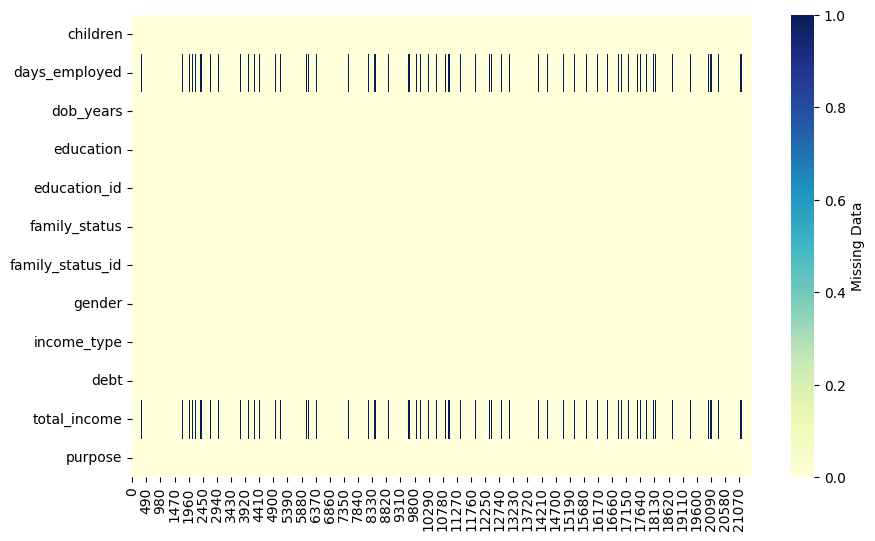

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("wizualizacja_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [24]:
sorted(df['education'].unique())

['ACADEMIC DEGREE',
 'Academic Degree',
 'BACHELOR DEGREE',
 'Bachelor Degree',
 'MASTERS DEGREE',
 'Masters Degree',
 'PRIMARY EDUCATION',
 'Primary Education',
 'SECONDARY EDUCATION',
 'Secondary Education',
 'academic degree',
 'bachelor degree',
 'masters degree',
 'primary education',
 'secondary education']

In [25]:
df['education']= df['education'].str.lower()

In [26]:
sorted(df['education'].unique())

['academic degree',
 'bachelor degree',
 'masters degree',
 'primary education',
 'secondary education']

In [28]:
df['education'].duplicated().sum()

21520

In [29]:
sorted(df['children'].unique())

[-1, 0, 1, 2, 3, 4, 5, 20]

In [31]:
len(df.loc[(df['children']== -1) | (df['children']== 20)]) / len(df)

0.005714285714285714

<Axes: ylabel='children'>

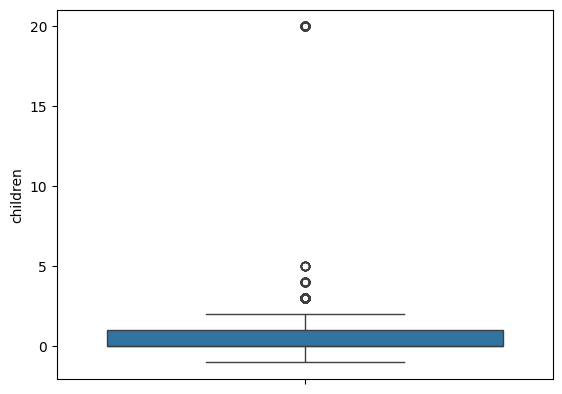

In [32]:
sns.boxplot(df['children'])

In [33]:
df['children'].describe()

count    21525.000000
mean         0.538908
std          1.381587
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64

In [34]:
condition_children = df['children']==20
df['children'] = df['children'].mask(condition_children, 2)

In [35]:
df['children'] = abs(df['children'])

In [36]:
sorted(df['children'].unique())

[0, 1, 2, 3, 4, 5]

In [37]:
df['days_employed'].unique()

array([-8437.67302776, -4024.80375385, -5623.42261023, ...,
       -2113.3468877 , -3112.4817052 , -1984.50758853])

<Axes: ylabel='days_employed'>

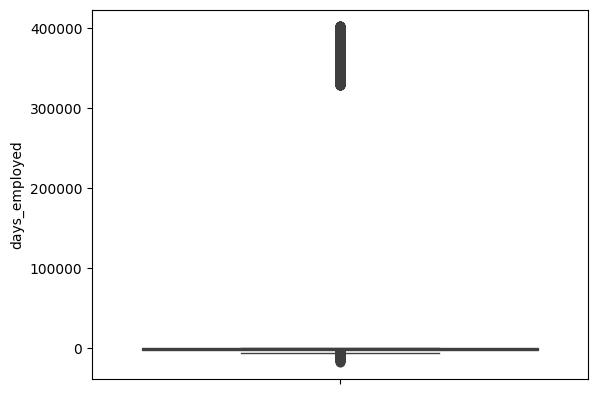

In [38]:
sns.boxplot(df['days_employed'])

In [39]:
len(df.loc[(df['days_employed'] < 0 ) |  (df['days_employed'] >200000)])   / len(df)

0.8990011614401858

In [40]:
df['days_employed'] = abs(df['days_employed'])

In [41]:
df['days_employed'] = round(df['days_employed'], 0 )

In [42]:
df['days_employed'].describe()

count     19351.000000
mean      66914.727973
std      139030.879631
min          24.000000
25%         927.000000
50%        2194.000000
75%        5538.000000
max      401755.000000
Name: days_employed, dtype: float64

In [46]:
condition_de = (df['days_employed'] > 200000) & (df['days_employed'].notnull())
df['days_employed'] = df['days_employed'].mask(condition_de, df['days_employed'].median())

In [47]:
df['days_employed'].unique()

array([2194.,   nan])

<Axes: ylabel='days_employed'>

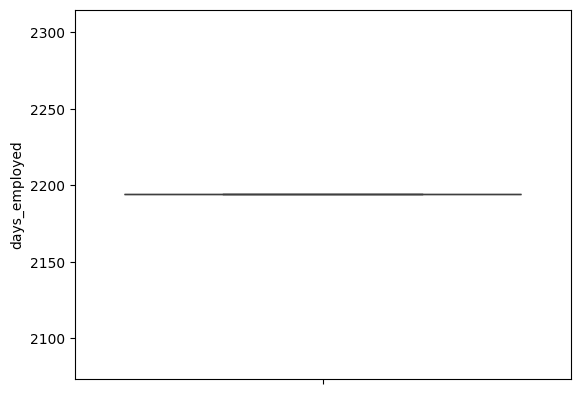

In [45]:
sns.boxplot(df['days_employed'])

In [48]:
sorted(df['dob_years'].unique())

[0,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75]

In [49]:
df['dob_years'].describe()

count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

In [ ]:
 #3. Feature engineering (scalling, normalisation, standardisation)

In [8]:
df = df.dropna(subset=["gender", "dob_years", "total_income", "children", "debt"])


In [9]:
# 0. Load
df = pd.read_csv("credit_scoring_eng.csv")

# 1. Encode categorical
df['gender'] = df['gender'].map({'F': 0, 'M': 1})

# 2. Fill missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
df[["dob_years", "total_income", "children"]] = imputer.fit_transform(df[["dob_years", "total_income", "children"]])
df["gender"] = df["gender"].fillna(df["gender"].mode()[0])

# 3. Feature and target
feature_names = ["gender", "dob_years", "total_income", "children"]
target_name = "debt"

# 4. Train/test split
from sklearn.model_selection import train_test_split
X = df[feature_names]
y = df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=42)

# 5. Scalers
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error

scalers = {
    "MaxAbsScaler": MaxAbsScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}
results = {}

# 6. Loop through scalers
for name, scaler in scalers.items():
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LogisticRegression(random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {"R2": r2, "MSE": mse}

# 7. Output
print("=== Logistic Regression Results (with Missing Values Handled) ===")
for name, score in results.items():
    print(f"{name}: R2 = {score['R2']:.4f}, MSE = {score['MSE']:.4f}")


=== Logistic Regression Results (with Missing Values Handled) ===
MaxAbsScaler: R2 = -0.0858, MSE = 0.0790
MinMaxScaler: R2 = -0.0858, MSE = 0.0790
StandardScaler: R2 = -0.0858, MSE = 0.0790
